In [5]:
#Importamos librerías necesarias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [6]:
train = pd.read_csv('Datos/train.csv')
X_test = pd.read_csv('Datos/test.csv')
X_test
y_test = pd.read_csv('Datos/gender_submission.csv')
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [7]:
def hotdeck_age(x):
    for column in train.columns:
        # Encontrar índices donde hay valores faltantes
        missing_indices = x[x["Age"].isnull()].index
        
        for idx in missing_indices:
            # Seleccionar filas no faltantes
            non_missing_values = x["Age"].dropna()
            # Elegir un valor aleatorio de las filas no faltantes
            random_value = non_missing_values.sample(n=1).values[0]
            # Imputar el valor aleatorio en el índice correspondiente
            x.at[idx, "Age"] = random_value
            
    return x

In [8]:
def hotdeck_embarked(x):
    for column in x.columns:
        # Encontrar índices donde hay valores faltantes
        missing_indices = x[x["Embarked"].isnull()].index
        
        for idx in missing_indices:
            # Seleccionar filas no faltantes
            non_missing_values = x["Embarked"].dropna()
            # Elegir un valor aleatorio de las filas no faltantes
            random_value = non_missing_values.sample(n=1).values[0]
            # Imputar el valor aleatorio en el índice correspondiente
            x.at[idx, "Embarked"] = random_value
            
    return x

In [9]:
def hotdeck_fare(x):
    for column in x.columns:
        # Encontrar índices donde hay valores faltantes
        missing_indices = x[x["Fare"].isnull()].index
        
        for idx in missing_indices:
            # Seleccionar filas no faltantes
            non_missing_values = x["Fare"].dropna()
            # Elegir un valor aleatorio de las filas no faltantes
            random_value = non_missing_values.sample(n=1).values[0]
            # Imputar el valor aleatorio en el índice correspondiente
            x.at[idx, "Fare"] = random_value
            
    return x

In [10]:
train = hotdeck_age(train)
train = hotdeck_embarked(train)

In [11]:
train = pd.get_dummies(train, columns = ['Sex', 'Pclass', 'Embarked'], drop_first=True, dtype=float)

In [12]:
X_train = train[["Age", "SibSp", "Parch", "Fare", "Sex_male", "Pclass_2", "Pclass_3", "Embarked_Q", "Embarked_S"]]
Y_train = train[["Survived"]]

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# Supongamos que tienes tus datos en X_train y Y_train
X_train = train[["Age", "SibSp", "Parch", "Fare", "Sex_male", "Pclass_2", "Pclass_3", "Embarked_Q", "Embarked_S"]]
Y_train = train["Survived"]

# Definir el modelo RandomForestClassifier
model = RandomForestClassifier()

# Definir los parámetros para el GridSearch
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar el GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Ajustar el GridSearchCV a los datos
grid_search.fit(X_train, Y_train)

# Obtener los mejores parámetros y el mejor puntaje
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Mejores parámetros: {best_params}")
print(f"Mejor puntaje: {best_score}")

Mejores parámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 10}
Mejor puntaje: 0.8294457347310276


Random Forest 10 árboles: Mean accuracy = 0.7926053639846743, Std = 0.08230114261525735
Random Forest 50 árboles: Mean accuracy = 0.8038314176245209, Std = 0.07694932776106354
Random Forest 100 árboles: Mean accuracy = 0.7993869731800766, Std = 0.07502541859208306
Random Forest 200 árboles: Mean accuracy = 0.8095785440613027, Std = 0.07628948059214102
Random Forest max_depth=5: Mean accuracy = 0.8237931034482759, Std = 0.059913731084066134
Random Forest max_depth=10: Mean accuracy = 0.8283524904214559, Std = 0.06411989291201554
Random Forest max_depth=None: Mean accuracy = 0.8004980842911879, Std = 0.08257519228059025
Random Forest GridSearch: Mean accuracy = 0.8240229885057471, Std = 0.06288056724806


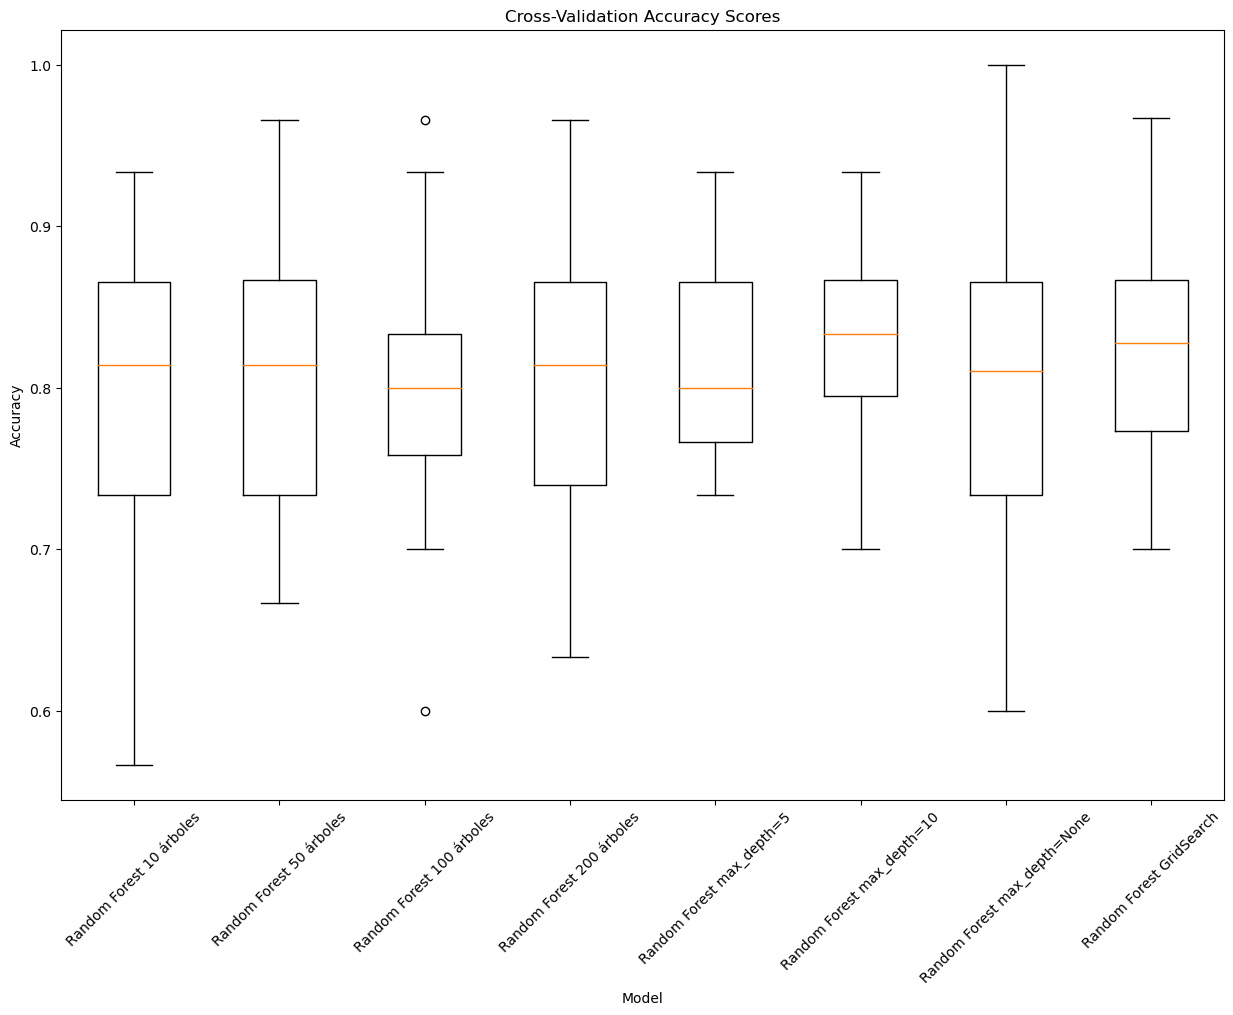

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que tienes tus datos en X_train y Y_train
X_train = train[["Age", "SibSp", "Parch", "Fare", "Sex_male", "Pclass_2", "Pclass_3", "Embarked_Q", "Embarked_S"]]
Y_train = train["Survived"]

# Definir diferentes configuraciones de Random Forest
models = {
    'Random Forest 10 árboles': RandomForestClassifier(n_estimators=10),
    'Random Forest 50 árboles': RandomForestClassifier(n_estimators=50),
    'Random Forest 100 árboles': RandomForestClassifier(n_estimators=100),
    'Random Forest 200 árboles': RandomForestClassifier(n_estimators=200),
    'Random Forest max_depth=5': RandomForestClassifier(max_depth=5),
    'Random Forest max_depth=10': RandomForestClassifier(max_depth=10),
    'Random Forest max_depth=None': RandomForestClassifier(max_depth=None),
    'Random Forest GridSearch': RandomForestClassifier(max_depth= 20, min_samples_leaf = 1, min_samples_split = 10, n_estimators = 10),
}

kf = KFold(n_splits=30)  # Aquí usamos 30 folds

results = {}

for model_name, model in models.items():
    scores = cross_val_score(model, X_train, Y_train, cv=kf, scoring='accuracy')
    results[model_name] = scores
    print(f'{model_name}: Mean accuracy = {np.mean(scores)}, Std = {np.std(scores)}')

# Graficar los resultados
plt.figure(figsize=(15, 10))
plt.boxplot(results.values(), labels=results.keys())
plt.title('Cross-Validation Accuracy Scores')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

In [15]:
X_test = hotdeck_age(X_test)

In [16]:
X_test = hotdeck_fare(X_test)

In [17]:
X_test = pd.get_dummies(X_test, columns = ['Sex', 'Pclass', 'Embarked'], drop_first=True, dtype=float)

In [18]:
y_test = y_test[["Survived"]]

In [19]:
X_test = X_test[["Age", "SibSp", "Parch", "Fare", "Sex_male", "Pclass_2", "Pclass_3", "Embarked_Q", "Embarked_S"]]

In [20]:
X_train.head(3)

,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,1.0,0.0,1.0,0.0,1.0
1,38.0,1,0,71.2833,0.0,0.0,0.0,0.0,0.0
2,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,1.0


In [21]:
X_test = X_test[["Age", "SibSp", "Parch", "Fare", "Sex_male", "Pclass_2", "Pclass_3", "Embarked_Q", "Embarked_S"]]

In [25]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

In [26]:
smote = SMOTE()
X_train_balanced, Y_train_balanced = smote.fit_resample(X_train, Y_train)

In [27]:
X_train_balanced = X_train_balanced[["Age", "SibSp", "Parch", "Fare", "Sex_male", "Pclass_2", "Pclass_3", "Embarked_Q", "Embarked_S"]]

In [ ]:
# Definir el modelo cuadrático
model = RandomForestClassifier(max_depth = 5)

# Entrenar el modelo con el conjunto de entrenamiento completo
model.fit(X_train_balanced, Y_train_balanced)

Accuracy on test set: 0.9330143540669856


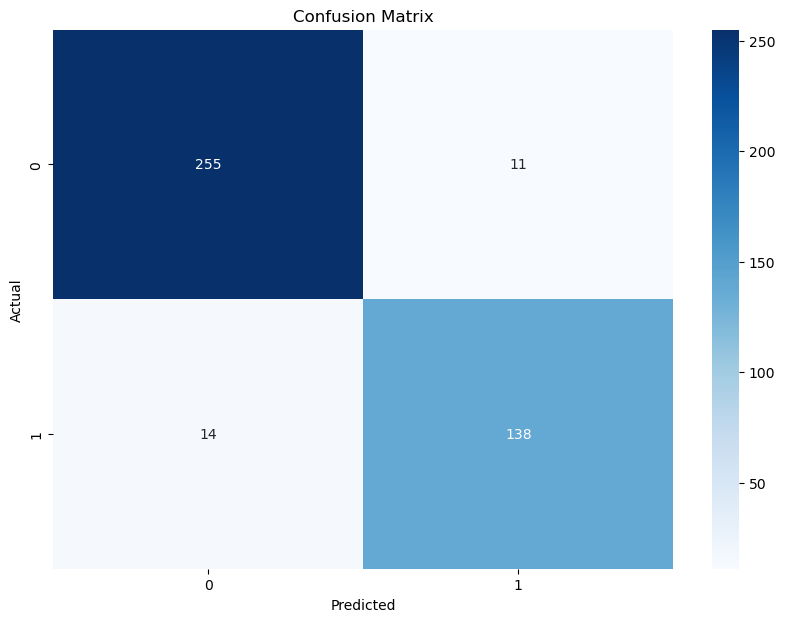

In [54]:
# Definir el modelo cuadrático
model = RandomForestClassifier(max_depth = 5)

# Entrenar el modelo con el conjunto de entrenamiento completo
model.fit(X_train_balanced, Y_train_balanced)

# Evaluar el modelo con el conjunto de test
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy on test set: {accuracy}')

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, Y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [55]:
Y_pred = pd.DataFrame(y_pred, columns=['Survived'])

In [ ]:
#pd.DataFrame(y_pred, columns=['Survived']).to_csv('Datos/y_pred.csv', index=False)

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Calcular métricas
accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred)
recall = recall_score(y_test, Y_pred)
f1 = f1_score(y_test, Y_pred)
roc_auc = roc_auc_score(y_test, Y_pred)

# Mostrar resultados
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

# Mostrar matriz de confusión y reporte de clasificación
print(confusion_matrix(y_test, Y_pred))
print(classification_report(y_test, Y_pred))

Accuracy: 0.9330143540669856
Precision: 0.918918918918919
Recall: 0.8947368421052632
F1-Score: 0.9066666666666666
ROC-AUC: 0.9248120300751881
[[254  12]
 [ 16 136]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       266
           1       0.92      0.89      0.91       152

    accuracy                           0.93       418
   macro avg       0.93      0.92      0.93       418
weighted avg       0.93      0.93      0.93       418



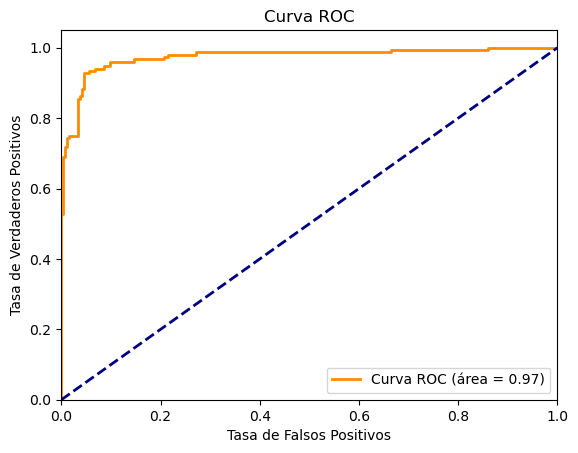

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, Y_pred)
roc_auc = auc(fpr, tpr)

Y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_pred_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()